In [109]:
import numpy as np
import sys

import matplotlib
import matplotlib.pyplot as plt

import sklearn.linear_model

import pandas as pd

import csv

import os

import matplotlib.colors as mcolors

# 1) Forarbejde af datasæt

Vi starter med at læse vores data og får skabt et overblik gennem en tabel. Øverste tabel viser de første indlæste data, mens den nederste tabel viser de sidste indlæste data. Alt er fra det samme datasæt

In [110]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [111]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


Vi kigger også lige på størrelsen af vores data (rækker og kolonner), og hvilke typer af data sættet indeholder. 

In [112]:
data.shape , data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


((1000, 8), None)

Vi laver også en hurtig statistisk analyse af datasættet, hvor det inkluderer middelværdi, standardafvigelsen, min & max værdi, og 25%, 50% og 75%  kvartiler. 

In [113]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Vi kigger derefter på, om nogle af vores rækker har nogle manglende celler / værdier. Dette gøres ved at undersøge, om der er null i rækkerne:

In [114]:
data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


Vi kan ikke se alle rækker, så derfor tjekker vi summet af null i vores datasæt. Det viser siger heldigvis, at der ikke er nogle:

In [115]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Vi kigger nu på, antallet af de forskellige scores, der er blevet givet i de forskellige test:

In [116]:
data["math score"].value_counts()

65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math score, Length: 81, dtype: int64

In [117]:
data["reading score"].value_counts()

72    34
74    33
64    32
73    30
67    30
      ..
32     1
28     1
26     1
23     1
17     1
Name: reading score, Length: 72, dtype: int64

In [118]:
data["writing score"].value_counts()

74    35
70    33
68    31
73    28
62    27
      ..
23     1
22     1
19     1
15     1
10     1
Name: writing score, Length: 77, dtype: int64

Vi skal desuden have ændret vores strings (objects i de forskellige kategorier om til floats, så vores Random Forest regressor kan fitter vores data. Dette gøres på følgende måde:

In [119]:
for col in data.dtypes[data.dtypes == "object"].index:
    for_dummy = data.pop(col)
    data = pd.concat([data, pd.get_dummies(for_dummy, prefix = col)], axis = 1)
data.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


Vi kan altså se, at vi nu har 17 kategorier pga. vores dummy classifier. Den har lavet en kolonne for hver svar mulighed, og sætter "1" eller "0" ved det pågældende celle, hvis det er sandt eller ej.

Vi tjekker nu, hvilken datatype vi nu har i vores datasæt:

In [120]:
data.dtypes

math score                                        int64
reading score                                     int64
writing score                                     int64
gender_female                                     uint8
gender_male                                       uint8
race/ethnicity_group A                            uint8
race/ethnicity_group B                            uint8
race/ethnicity_group C                            uint8
race/ethnicity_group D                            uint8
race/ethnicity_group E                            uint8
parental level of education_associate's degree    uint8
parental level of education_bachelor's degree     uint8
parental level of education_high school           uint8
parental level of education_master's degree       uint8
parental level of education_some college          uint8
parental level of education_some high school      uint8
lunch_free/reduced                                uint8
lunch_standard                                  

Nu splitter vi vores data i træningsæt og testsæt. Men først udelukker vi math, reading og writing scores fra vores datasæt, da disse er vores output features. 

In [121]:
X = data.drop(['math score','reading score','writing score'], axis = 1)
X.shape # Undersøger, hvor mange kolonner vi har.
print(X[:10])

   gender_female  gender_male  race/ethnicity_group A  race/ethnicity_group B  \
0              1            0                       0                       1   
1              1            0                       0                       0   
2              1            0                       0                       1   
3              0            1                       1                       0   
4              0            1                       0                       0   
5              1            0                       0                       1   
6              1            0                       0                       1   
7              0            1                       0                       1   
8              0            1                       0                       0   
9              1            0                       0                       1   

   race/ethnicity_group C  race/ethnicity_group D  race/ethnicity_group E  \
0                       0      

Vi definerer vores output feature:

In [122]:
y = data[['math score','reading score', 'writing score']]
y.shape
print(y[:10])

   math score  reading score  writing score
0          72             72             74
1          69             90             88
2          90             95             93
3          47             57             44
4          76             78             75
5          71             83             78
6          88             95             92
7          40             43             39
8          64             64             67
9          38             60             50


Vi splitter no vores y-data i tre forskellige output features og tjekker lige for sjov skyld middelværdien:

In [123]:
import statistics
mean = statistics.mean

y_math = y['math score']
y_reading = y['reading score']
y_writing = y['writing score']
print('Middelværdi for math score:', mean(y_math))
print('Middelværdi for reading score:', mean(y_reading))
print('Middelværdi for writing score:', mean(y_writing))

Middelværdi for math score: 66.089
Middelværdi for reading score: 69.169
Middelværdi for writing score: 68.054


# 2) Databehandlingen - part 1

## 2.1) Opdeling af scores

Nu kan vi dele vores datasæt op i trænings- og testsæt, hvor vi deler vores output features op i tre: math, reading og writing:

In [124]:
from sklearn.model_selection import train_test_split

# Math

X_math_train, X_math_test, y_math_train, y_math_test = train_test_split(X, y_math, test_size = 0.20)

# Reading

X_reading_train, X_reading_test, y_reading_train, y_reading_test = train_test_split(X, y_reading, test_size = 0.20)

# Writing

X_writing_train, X_writing_test, y_writing_train, y_writing_test = train_test_split(X, y_writing, test_size = 0.20)

In [125]:
print('For math bliver dimensionerne på input og output trænings- og test-data følgende:', X_math_train.shape , X_math_test.shape , y_math_train.shape , y_math_test.shape)
print('For reading bliver dimensionerne på input og output trænings- og test-data følgende:', X_reading_train.shape , X_reading_test.shape , y_reading_train.shape , y_reading_test.shape)
print('For writing bliver dimensionerne på input og output trænings- og test-data følgende:', X_writing_train.shape , X_writing_test.shape , y_writing_train.shape , y_writing_test.shape)

For math bliver dimensionerne på input og output trænings- og test-data følgende: (800, 17) (200, 17) (800,) (200,)
For reading bliver dimensionerne på input og output trænings- og test-data følgende: (800, 17) (200, 17) (800,) (200,)
For writing bliver dimensionerne på input og output trænings- og test-data følgende: (800, 17) (200, 17) (800,) (200,)


Vi laver nu vores Random Forest model:

In [126]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100, random_state = 100)

# Fitter modellen

model_rf_math = model.fit(X_math_train, y_math_train)
model_rf_reading = model.fit(X_reading_train, y_reading_train)
model_rf_writing = model.fit(X_writing_train, y_writing_train)

## 2.2) Evaluring af modellen - træningssæt

Vi importerer fra sklearn de pakker, som kan udregne MAE, MSE, RMSE, EVS, R2-score

In [249]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.metrics import classification_report

<u> Predikterede værdier </u>

In [251]:
ymathtrain_pred = model_rf_math.predict(X_math_train)
yreadingtrain_pred = model_rf_reading.predict(X_reading_train)
ywritingtrain_pred = model_rf_writing.predict(X_writing_train)
print('*De første 10 predikterede resultater med træningssæt for math: \n', ymathtrain_pred[:10])
print('*De første 10 predikterede resultater med træningssæt for reading: \n', yreadingtrain_pred[:10])
print('*De første 10 predikterede resultater med træningssæt for writing: \n', ywritingtrain_pred[:10])

*De første 10 predikterede resultater med træningssæt for math: 
 [72.69757143 81.65133333 79.76587302 62.92214428 79.66802381 79.55361161
 60.65927381 74.37049603 83.781      78.9427785 ]
*De første 10 predikterede resultater med træningssæt for reading: 
 [54.45155726 66.64140873 61.42741667 90.98883333 75.29379942 68.98150519
 50.83515873 74.5189246  56.57347436 76.1082482 ]
*De første 10 predikterede resultater med træningssæt for writing: 
 [68.65972669 79.76587302 77.87909524 73.71145022 89.09688492 79.76587302
 67.58981349 58.56023962 83.91085458 68.98150519]


<u> Middelværdi af predikterede værdier (HUSK, det er misvisende) </u>

In [252]:
print('Middelværdi for math score med træningssæt:', mean(ymathtrain_pred))
print('Middelværdi for reading score med træningssæt:', mean(yreadingtrain_pred))
print('Middelværdi for writing score med træningssæt:', mean(ywritingtrain_pred))

Middelværdi for math score med træningssæt: 67.80694119213724
Middelværdi for reading score med træningssæt: 67.84884446727555
Middelværdi for writing score med træningssæt: 67.96666168717996


<u> Coefficient of determination / Accuracy (R2) </u>

In [253]:
print('R2-score for math med træningssæt bliver: %.4f'% model_rf_math.score(X_math_train,y_math_train))
print('R2-score for reading med træningssæt bliver: %.4f'% model_rf_reading.score(X_reading_train,y_reading_train))
print('R2-score for writing med træningssæt bliver: %.4f'% model_rf_writing.score(X_writing_train,y_writing_train))

R2-score for math med træningssæt bliver: 0.0642
R2-score for reading med træningssæt bliver: 0.2816
R2-score for writing med træningssæt bliver: 0.4587


Hvilket er super duper dårligt. 

<u> Mean Absolute Error (MAE) </u>

In [130]:
print('MAE for træningssæt med math: %.4f'% mean_absolute_error(y_math_train, ymathtrain_pred))
print('MAE for træningssæt med reading: %.4f'% mean_absolute_error(y_reading_train, yreadingtrain_pred))
print('MAE for træningssæt med writing: %.4f'% mean_absolute_error(y_writing_train, ywritingtrain_pred))

MAE for træningssæt med math: 11.8034
MAE for træningssæt med reading: 9.8307
MAE for træningssæt med writing: 8.7579


<u> Mean Squared Error (MSE) </u>

In [131]:
print('MSE for træningssæt med math: %.4f'% mean_squared_error(y_math_train, ymathtrain_pred))
print('MSE for træningssæt med reading: %.4f'% mean_squared_error(y_reading_train, yreadingtrain_pred))
print('MSE for træningssæt med writing: %.4f'% mean_squared_error(y_writing_train, ywritingtrain_pred))

MSE for træningssæt med math: 217.3212
MSE for træningssæt med reading: 149.9564
MSE for træningssæt med writing: 122.9338


<u> Root-mean-square error (RMSE) </u>

In [132]:
print('RMSE for træningssæt med math: %.4f'% np.sqrt(mean_squared_error(y_math_train, ymathtrain_pred)))
print('RMSE for træningssæt med reading: %.4f'% np.sqrt(mean_squared_error(y_reading_train, yreadingtrain_pred)))
print('RMSE for træningssæt med writing: %.4f'% np.sqrt(mean_squared_error(y_writing_train, ywritingtrain_pred)))

RMSE for træningssæt med math: 14.7418
RMSE for træningssæt med reading: 12.2457
RMSE for træningssæt med writing: 11.0876


<u> Explained Variance Score (EVS) </u>

In [133]:
print('EVS for træningssæt med math: %.4f'% explained_variance_score(y_math_train, ymathtrain_pred))
print('EVS for træningssæt med reading: %.4f'% explained_variance_score(y_reading_train, yreadingtrain_pred))
print('EVS for træningssæt med writing: %.4f'% explained_variance_score(y_writing_train, ywritingtrain_pred))

EVS for træningssæt med math: 0.0790
EVS for træningssæt med reading: 0.2860
EVS for træningssæt med writing: 0.4587


## 2.3) Evaluring af modellen - testsæt

Definerer vores predikterede output features gennem vores testsæt, og ser på de 10 første predikterede værdier:

In [134]:
ymathtest_pred = model_rf_math.predict(X_math_test)
yreadingtest_pred = model_rf_reading.predict(X_reading_test)
ywritingtest_pred = model_rf_writing.predict(X_writing_test)
print('*De første 10 predikterede resultater med testsæt for math: \n', ymathtest_pred[:10])
print('*De første 10 predikterede resultater med testsæt for reading: \n', yreadingtest_pred[:10])
print('*De første 10 predikterede resultater med testsæt for writing: \n', ywritingtest_pred[:10])

*De første 10 predikterede resultater med testsæt for math: 
 [64.39348677 68.98150519 65.7145268  66.29476959 75.29379942 57.98495563
 59.6638658  72.69757143 64.68117019 60.50083333]
*De første 10 predikterede resultater med testsæt for reading: 
 [79.8813355  65.07169336 72.49873413 65.07169336 57.98495563 75.39674698
 65.50429762 72.49873413 89.09688492 81.08483333]
*De første 10 predikterede resultater med testsæt for writing: 
 [66.56214286 76.44892857 81.08483333 68.98150519 54.75570022 62.92214428
 76.1082482  80.92429762 38.512      61.42741667]


<u> Middel for predikterede værdier (HUSK, det er misvisende) </u>

In [135]:
print('Middelværdi for math score med testssæt:', mean(ymathtest_pred))
print('Middelværdi for reading score med testssæt:', mean(yreadingtest_pred))
print('Middelværdi for writing score med testssæt:', mean(ywritingtest_pred))

Middelværdi for math score med testssæt: 68.1086188520595
Middelværdi for reading score med testssæt: 67.94100575150628
Middelværdi for writing score med testssæt: 67.46973687188864


<u> Coefficient of determination / Accuracy (R2) </u>

In [136]:
print('R2-score for math med testsæt bliver: %.4f'% model_rf_math.score(X_math_test,y_math_test))
print('R2-score for reading med testsæt bliver: %.4f'% model_rf_reading.score(X_reading_test,y_reading_test))
print('R2-score for writing med testsæt bliver: %.4f'% model_rf_writing.score(X_writing_test,y_writing_test))

R2-score for math med testsæt bliver: 0.0450
R2-score for reading med testsæt bliver: 0.2973
R2-score for writing med testsæt bliver: 0.2128


<u> Mean Absolute Error (MAE) </u>

In [137]:
print('MAE for testsæt med math: %.4f'% mean_absolute_error(y_math_test, ymathtest_pred))
print('MAE for testsæt med reading: %.4f'% mean_absolute_error(y_reading_test, yreadingtest_pred))
print('MAE for testsæt med writing: %.4f'% mean_absolute_error(y_writing_test, ywritingtest_pred))

MAE for testsæt med math: 11.7972
MAE for testsæt med reading: 9.9303
MAE for testsæt med writing: 11.1863


<u> Mean Squared Error (MSE) </u>

In [138]:
print('MSE for testsæt med math: %.4f'% mean_squared_error(y_math_test, ymathtest_pred))
print('MSE for testsæt med reading: %.4f'% mean_squared_error(y_reading_test, yreadingtest_pred))
print('MSE for testsæt med writing: %.4f'% mean_squared_error(y_writing_test, ywritingtest_pred))

MSE for testsæt med math: 209.2957
MSE for testsæt med reading: 159.7084
MSE for testsæt med writing: 192.6245


<u> Root-mean-square error (RMSE) </u>

In [139]:
print('RMSE for testsæt med math: %.4f'% np.sqrt(mean_squared_error(y_math_test, ymathtest_pred)))
print('RMSE for testsæt med reading: %.4f'% np.sqrt(mean_squared_error(y_reading_test, yreadingtest_pred)))
print('RMSE for testsæt med writing: %.4f'% np.sqrt(mean_squared_error(y_writing_test, ywritingtest_pred)))

RMSE for testsæt med math: 14.4671
RMSE for testsæt med reading: 12.6376
RMSE for testsæt med writing: 13.8789


<u> Explained Variance Score (EVS) </u>

In [140]:
print('EVS for testsæt med math: %.4f'% explained_variance_score(y_math_test, ymathtest_pred))
print('EVS for testsæt med reading: %.4f'% explained_variance_score(y_reading_test, yreadingtest_pred))
print('EVS for testsæt med writing: %.4f'% explained_variance_score(y_writing_test, ywritingtest_pred))

EVS for testsæt med math: 0.0550
EVS for testsæt med reading: 0.3286
EVS for testsæt med writing: 0.2174


## 2.4) Plot af observede og predikterede værdier

Definerer, hvor stor vores plot-figur skal være, og hvor lang x-aksen skal være. Vi plotter vores math score fra vores testsæt og sammenligner det med vores predikterede math score fra vores testsæt

<u> Plot af math score </u>

Text(0.5, 1.0, 'Sammeligning af observerede og predikterede math score')

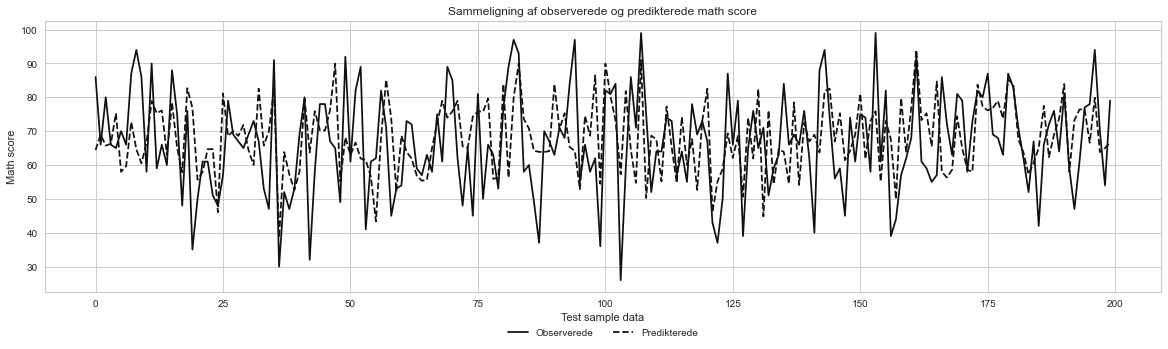

In [254]:
plt.rcParams['figure.figsize'] = (20,5)
x_ax = range(len(X_math_test))

plt.plot(x_ax,y_math_test, label = 'Observerede', color = 'k', linestyle = '-')
plt.plot(x_ax,ymathtest_pred, label = 'Predikterede', color = 'k', linestyle = '--')
plt.ylabel('Math score')
plt.xlabel('Test sample data')
plt.legend(bbox_to_anchor = (0.5, -0.20), loc = 'lower center', ncol = 2, frameon = False)
plt.title('Sammeligning af observerede og predikterede math score')

<u> Plot af reading score </u>

Text(0.5, 1.0, 'Sammeligning af observerede og predikterede reading score')

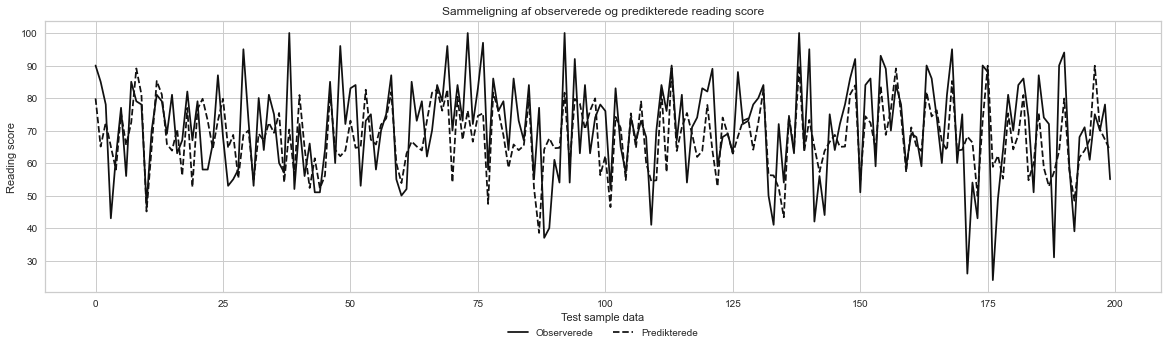

In [142]:
plt.plot(x_ax,y_reading_test, label = 'Observerede', color = 'k', linestyle = '-')
plt.plot(x_ax,yreadingtest_pred, label = 'Predikterede', color = 'k', linestyle = '--')
plt.ylabel('Reading score')
plt.xlabel('Test sample data')
plt.legend(bbox_to_anchor = (0.5, -0.20), loc = 'lower center', ncol = 2, frameon = False)
plt.title('Sammeligning af observerede og predikterede reading score')

<u> Plot af writing score </u>

Text(0.5, 1.0, 'Sammeligning af observerede og predikterede writing score')

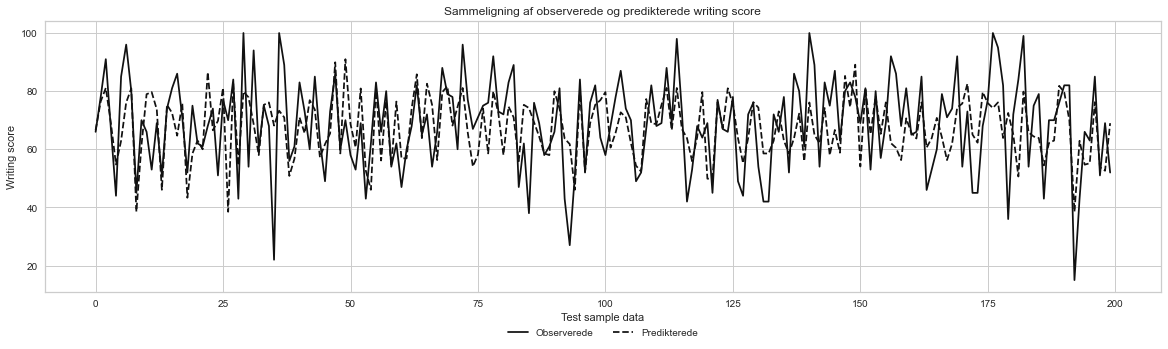

In [143]:
plt.plot(x_ax,y_writing_test, label = 'Observerede', color = 'k', linestyle = '-')
plt.plot(x_ax,ywritingtest_pred, label = 'Predikterede', color = 'k', linestyle = '--')
plt.ylabel('Writing score')
plt.xlabel('Test sample data')
plt.legend(bbox_to_anchor = (0.5, -0.20), loc = 'lower center', ncol = 2, frameon = False)
plt.title('Sammeligning af observerede og predikterede writing score')

<u> Plot af Mean Squared Prediction Error af math score. </u>

In [144]:
# !pip install --user yellowbrick --> Har installeret dette, så derfor har jeg udkommenteret det !!

C:\Users\orhan\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


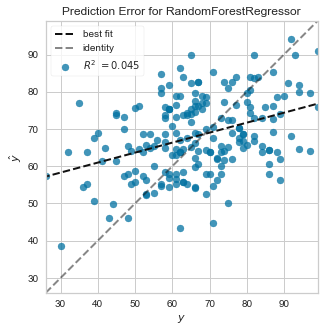

In [145]:
from yellowbrick.regressor import PredictionError

visualizer_math = PredictionError(model_rf_math)
visualizer_math.fit(X_math_train, y_math_train)
visualizer_math.score(X_math_test, y_math_test)
visualizer_math.show()

<u> Plot af Mean Squared Prediction Error af reading score. </u>

C:\Users\orhan\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


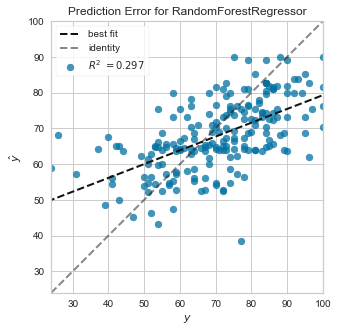

In [146]:
visualizer_reading = PredictionError(model_rf_reading)
visualizer_reading.fit(X_reading_train, y_reading_train)
visualizer_reading.score(X_reading_test, y_reading_test)
visualizer_reading.show()

<u> Plot af Mean Squared Prediction Error af writing score. </u>

C:\Users\orhan\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


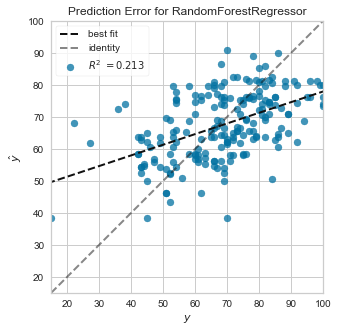

In [147]:
visualizer_writing = PredictionError(model_rf_writing)
visualizer_writing.fit(X_writing_train, y_writing_train)
visualizer_writing.score(X_writing_test, y_writing_test)
visualizer_writing.show()

Overstående grafer viser "^y" i y-aksen, som er vores predikterede værdier, mens "y" i x-aksen er vores observerede værdier.

<u> Plot af residualer af math score </u>

C:\Users\orhan\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


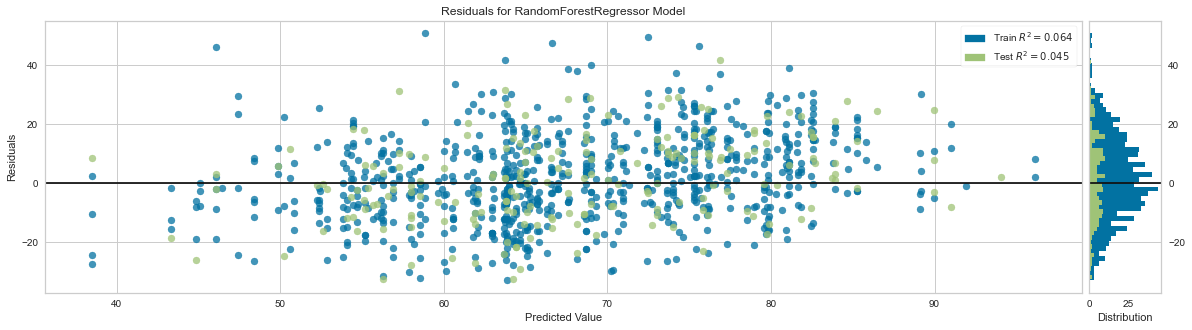

In [148]:
from yellowbrick.regressor import ResidualsPlot
visualizer_math = ResidualsPlot(model_rf_math)
visualizer_math.fit(X_math_train, y_math_train)
visualizer_math.score(X_math_test, y_math_test)
visualizer_math.show()

<u> Plot af residualer af math score </u>

C:\Users\orhan\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


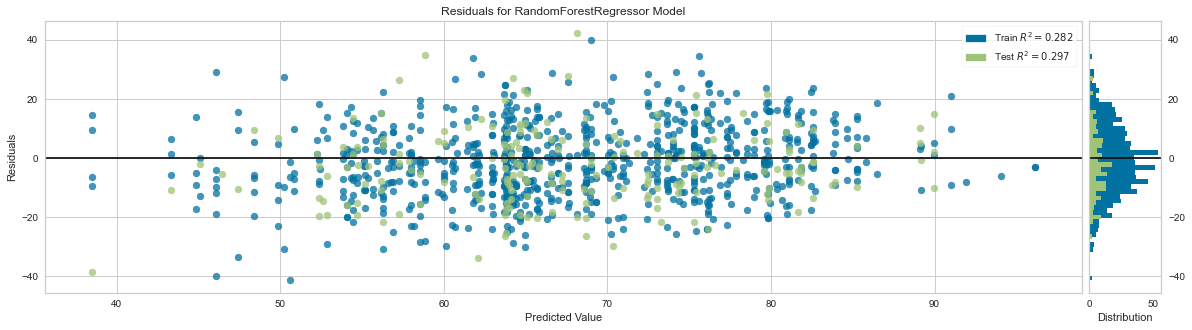

In [149]:
visualizer_reading = ResidualsPlot(model_rf_reading)
visualizer_reading.fit(X_reading_train, y_reading_train)
visualizer_reading.score(X_reading_test, y_reading_test)
visualizer_reading.show()

<u> Plot af residualer af math score </u>

C:\Users\orhan\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


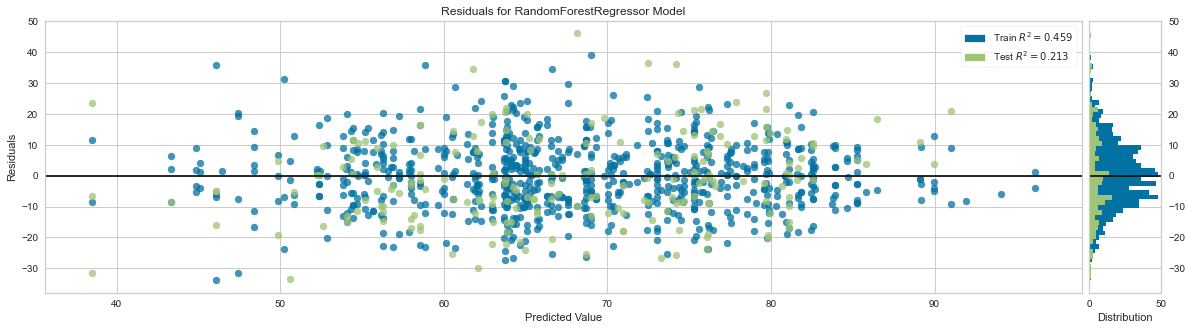

In [150]:
visualizer_writing = ResidualsPlot(model_rf_writing)
visualizer_writing.fit(X_writing_train, y_writing_train)
visualizer_writing.score(X_writing_test, y_writing_test)
visualizer_writing.show()

## 2.5) K-fold Cross-validation : Træningssæt

<u> Cross-validation </u>

In [151]:
from sklearn.model_selection import cross_val_score

# CV af træningssættet 

cv_math_score_train = cross_val_score(model_rf_math, X_math_train, y_math_train, scoring = 'neg_mean_squared_error', cv = 10)
cv_reading_score_train = cross_val_score(model_rf_reading, X_reading_train, y_reading_train, scoring = 'neg_mean_squared_error', cv = 10)
cv_writing_score_train = cross_val_score(model_rf_writing, X_writing_train, y_writing_train, scoring = 'neg_mean_squared_error', cv = 10)

print('*For math score med træningssæt:\n',cv_math_score_train)
print('*For reading score med træningssæt:\n',cv_reading_score_train)
print('*For writing score med træningssæt:\n',cv_writing_score_train)

*For math score med træningssæt:
 [-185.59630607 -234.42982396 -242.49710653 -288.35572785 -243.75954603
 -217.34158554 -195.44671493 -236.72809388 -221.18918518 -246.69062995]
*For reading score med træningssæt:
 [-193.1755841  -178.75134597 -172.66095722 -187.82038417 -270.03198381
 -198.90517769 -154.5609272  -208.60652817 -242.56962788 -239.71622167]
*For writing score med træningssæt:
 [-207.50797256 -183.38286748 -233.83586033 -197.62326711 -233.00024026
 -158.37530115 -207.38415369 -212.58953081 -206.16749082 -140.83073136]


<u> Absolutte middelværdi </u>

In [152]:
from numpy import absolute

print('For math score:', absolute(np.mean(cv_math_score_train)))
print('For reading score:', absolute(np.mean(cv_reading_score_train)))
print('For writing score:', absolute(np.mean(cv_writing_score_train)))

For math score: 231.20347199307133
For reading score: 204.679873787634
For writing score: 198.06974155643613


## 2.6) K-fold Cross-validation : Testset

<u> Cross-validation </u>

In [153]:
cv_math_score_test = cross_val_score(model_rf_math, X_math_test, y_math_test, scoring = 'neg_mean_squared_error', cv = 10)
cv_reading_score_test = cross_val_score(model_rf_reading, X_reading_test, y_reading_test, scoring = 'neg_mean_squared_error', cv = 10)
cv_writing_score_test = cross_val_score(model_rf_writing, X_writing_test, y_writing_test, scoring = 'neg_mean_squared_error', cv = 10)

print('*For math score med testset:\n',cv_math_score_test)
print('*For reading score med testset:\n',cv_reading_score_test)
print('*For writing score med testset:\n',cv_writing_score_test)

*For math score med testset:
 [-201.71841648 -209.48220073 -155.45304066 -200.32718569 -304.09386596
 -158.08278521 -168.13422584 -230.72515932 -241.8781616  -154.18316843]
*For reading score med testset:
 [-156.77113433 -170.68361664 -237.18857114 -183.50838694 -417.24034662
 -150.23487963 -221.8181599  -262.05457819 -372.43655529 -261.57208454]
*For writing score med testset:
 [-173.18765388 -358.61444971 -127.52732826 -235.24026733 -253.83799417
 -111.99680259 -204.0810832  -199.66693559 -344.26450595 -263.58176978]


<u> Absolutte middelværdi </u>

In [154]:
print('For math score:', absolute(np.mean(cv_math_score_test)))
print('For reading score:', absolute(np.mean(cv_reading_score_test)))
print('For writing score:', absolute(np.mean(cv_writing_score_test)))

For math score: 202.40782099060723
For reading score: 243.35083132230835
For writing score: 227.1998790461831


## 2.7) Feature importance 

<u> Math score </u>

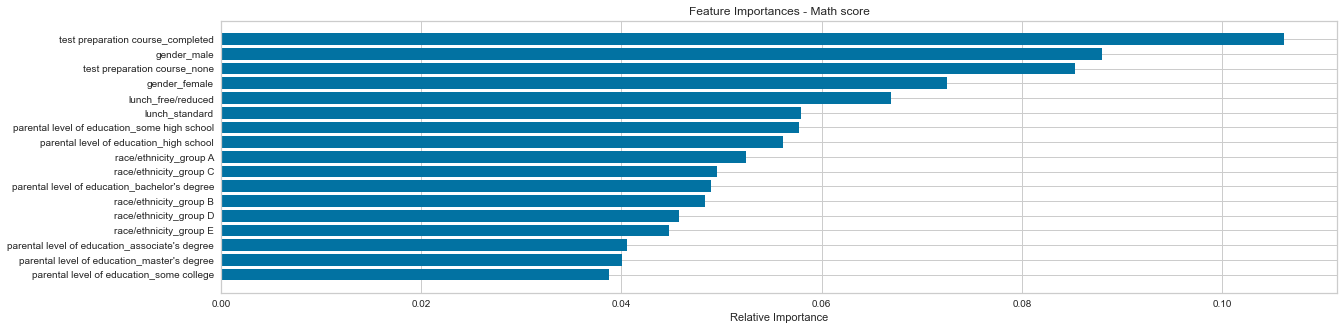

test preparation course_completed                 0.106170
gender_male                                       0.088048
test preparation course_none                      0.085326
gender_female                                     0.072530
lunch_free/reduced                                0.066971
lunch_standard                                    0.057924
parental level of education_some high school      0.057776
parental level of education_high school           0.056124
race/ethnicity_group A                            0.052437
race/ethnicity_group C                            0.049559
parental level of education_bachelor's degree     0.048938
race/ethnicity_group B                            0.048322
race/ethnicity_group D                            0.045731
race/ethnicity_group E                            0.044744
parental level of education_associate's degree    0.040594
parental level of education_master's degree       0.040027
parental level of education_some college          0.0387

(None, None)

In [155]:
from sklearn.pipeline import Pipeline

# Tabel

f_list = list(X.columns)
f_math_importance = pd.Series(model_rf_math.feature_importances_, index = f_list).sort_values(ascending = False)

# Plot
features_math= X.columns
importances_math = model_rf_math.feature_importances_
indices_math = np.argsort(importances_math)

plt.title('Feature Importances - Math score')
plt.barh(range(len(indices_math)), importances_math[indices_math], color = 'b', align = 'center')
plt.yticks(range(len(indices_math)), [features_math[i] for i in indices_math])
plt.xlabel('Relative Importance')
plt.show() , print(f_math_importance)

<u> Reading score (undersøger for sjov) </u>

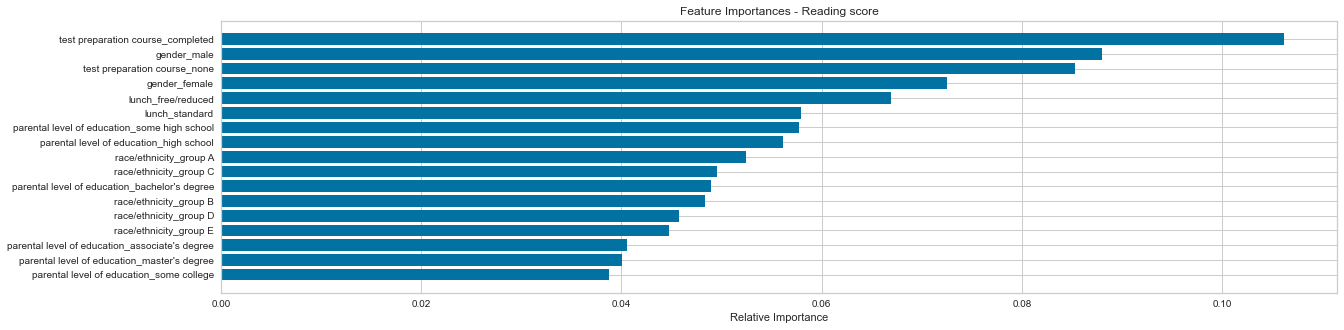

test preparation course_completed                 0.106170
gender_male                                       0.088048
test preparation course_none                      0.085326
gender_female                                     0.072530
lunch_free/reduced                                0.066971
lunch_standard                                    0.057924
parental level of education_some high school      0.057776
parental level of education_high school           0.056124
race/ethnicity_group A                            0.052437
race/ethnicity_group C                            0.049559
parental level of education_bachelor's degree     0.048938
race/ethnicity_group B                            0.048322
race/ethnicity_group D                            0.045731
race/ethnicity_group E                            0.044744
parental level of education_associate's degree    0.040594
parental level of education_master's degree       0.040027
parental level of education_some college          0.0387

(None, None)

In [156]:
# Tabel

f_list = list(X.columns)
f_reading_importance = pd.Series(model_rf_reading.feature_importances_, index = f_list).sort_values(ascending = False)

# Plot
features_reading= X.columns
importances_reading = model_rf_reading.feature_importances_
indices_reading = np.argsort(importances_reading)

plt.title('Feature Importances - Reading score')
plt.barh(range(len(indices_reading)), importances_reading[indices_reading], color = 'b', align = 'center')
plt.yticks(range(len(indices_reading)), [features_reading[i] for i in indices_reading])
plt.xlabel('Relative Importance')
plt.show() , print(f_reading_importance)

<u> Writing score (undersøger for sjov) </u>

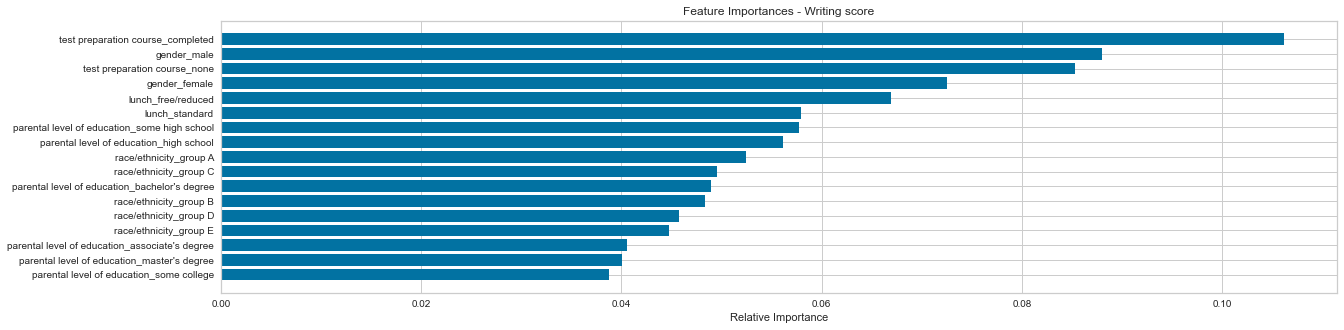

test preparation course_completed                 0.106170
gender_male                                       0.088048
test preparation course_none                      0.085326
gender_female                                     0.072530
lunch_free/reduced                                0.066971
lunch_standard                                    0.057924
parental level of education_some high school      0.057776
parental level of education_high school           0.056124
race/ethnicity_group A                            0.052437
race/ethnicity_group C                            0.049559
parental level of education_bachelor's degree     0.048938
race/ethnicity_group B                            0.048322
race/ethnicity_group D                            0.045731
race/ethnicity_group E                            0.044744
parental level of education_associate's degree    0.040594
parental level of education_master's degree       0.040027
parental level of education_some college          0.0387

(None, None)

In [157]:
# Tabel

f_list = list(X.columns)
f_writing_importance = pd.Series(model_rf_writing.feature_importances_, index = f_list).sort_values(ascending = False)

# Plot
features_writing= X.columns
importances_writing = model_rf_writing.feature_importances_
indices_writing = np.argsort(importances_writing)

plt.title('Feature Importances - Writing score')
plt.barh(range(len(indices_writing)), importances_writing[indices_writing], color = 'b', align = 'center')
plt.yticks(range(len(indices_writing)), [features_writing[i] for i in indices_writing])
plt.xlabel('Relative Importance')
plt.show() , print(f_writing_importance)

# Databehandling - part 2 (MODELLEN BLIVER DÅRLIGERE)

Vi bruger nu Grid Search til at optimere på vores hyperparametre i Random Forest regressor for at se, om vi kan forbedre vores Accuracy (R2-score) og undersøge, om vores tidligere scores har været over- eller underfit.  

In [220]:
from sklearn.model_selection import GridSearchCV

# Number of features to consider at every split
param_grid = {
    'n_estimators' : [int(x) for x in np.linspace(start =10, stop = 200, num = 20)],
    'max_depth': [2,4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    #'max_depth': [None, 10, 20, 30],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2', None, 0.2, 0.5],
    'bootstrap': [True, False],
    #'criterion': ['mse', 'mae'],
    #'max_samples': [None, 0.5, 0.7, 0.9],
    #'oob_score': [True, False]
}

rf_grid = GridSearchCV(model, param_grid, cv = 5, verbose = 2, n_jobs = 4, scoring ='neg_mean_squared_error')


**<u>Træningssæt</u>**

<u> Parametre for Math </u>

In [221]:
rf_grid_train_math = rf_grid.fit(X_math_train, y_math_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


In [222]:
rf_grid_train_math.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 130}

<u> Parametre for Reading </u>

In [224]:
rf_grid_train_reading = rf_grid.fit(X_reading_train, y_reading_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


In [225]:
rf_grid_train_reading.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 60}

<u> Parametre for Writing </u>

In [226]:
rf_grid_train_writing = rf_grid.fit(X_writing_train, y_writing_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


In [227]:
rf_grid_train_writing.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

<u> Accuracy (R2) for samtlige scores </u>

In [232]:
print(f' R2 score for math med træningssæt: {rf_grid_train_math.score(X_math_train, y_math_train):.3f}')
print(f' R2 score for reading med træningssæt: {rf_grid_train_reading.score(X_reading_train, y_reading_train):.3f}')
print(f' R2 score for writing med træningssæt: {rf_grid_train_writing.score(X_writing_train, y_writing_train):.3f}')

 R2 score for math med træningssæt: -227.709
 R2 score for reading med træningssæt: -164.475
 R2 score for writing med træningssæt: -157.978


Modellen er åbenbart blevet dårligere :^) 

<u> Predikterede y-værdier </u>

In [247]:
best_model_math = rf_grid_train_math.best_estimator_
best_model_reading = rf_grid_train_reading.best_estimator_
best_model_writing = rf_grid_train_writing.best_estimator_

ymathtrain_grid_pred = best_model_math.predict(X_math_train)
yreadingtrain_grid_pred = best_model_reading.predict(X_reading_train)
ywritingtrain_grid_pred = best_model_writing.predict(X_writing_train)
print('*De første 10 predikterede resultater med træningssæt for math: \n', ymathtrain_grid_pred[:10])
print('*De første 10 predikterede resultater med træningssæt for reading: \n', yreadingtrain_grid_pred[:10])
print('*De første 10 predikterede resultater med træningssæt for writing: \n', ywritingtrain_grid_pred[:10])

*De første 10 predikterede resultater med træningssæt for math: 
 [72.22728312 76.15172439 77.02708382 63.82446079 73.46460331 68.00345957
 61.85269056 71.98229278 80.57567034 71.94534156]
*De første 10 predikterede resultater med træningssæt for reading: 
 [61.13027746 69.84877613 71.90963308 81.38467805 70.50280533 68.62924589
 58.28549703 75.63154478 63.57770033 72.81527917]
*De første 10 predikterede resultater med træningssæt for writing: 
 [70.76737626 77.02708382 76.43429452 73.83697933 72.99221836 77.02708382
 69.68571103 63.31849482 73.27447765 68.62924589]


<u> Mean absolute error (MAE) </u>

In [243]:
print('MAE for træningssæt med math: %.4f'% mean_absolute_error(y_math_train, ymathtrain_grid_pred))
print('MAE for træningssæt med reading: %.4f'% mean_absolute_error(y_reading_train, yreadingtrain_grid_pred))
print('MAE for træningssæt med writing: %.4f'% mean_absolute_error(y_writing_train, ywritingtrain_grid_pred))

MAE for træningssæt med math: 12.0981
MAE for træningssæt med reading: 10.2722
MAE for træningssæt med writing: 9.9922
